In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
hdb_df = pd.read_csv("C:/Users/ELCOT/Downloads/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [7]:
hdb_df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [8]:
#Selecting the features by importance
hdb_df = hdb_df.drop(['month', 'street_name', 'flat_model', 'lease_commence_date', 'block'], axis = 1)

In [9]:
# Let's rename the column so it will be clearer
hdb_df = hdb_df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [10]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [17]:
# I revise the format of the data in the remaining lease to be quantifiable (change to float).
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].str.split(' ')
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].apply(lambda x: (float(x[0])+(float(x[2])/12)) if (len(x)==4) else float(x[0]))
hdb_df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2,12,44.0,61.333333,232000.0
1,ANG MO KIO,3,3,67.0,60.583333,250000.0
2,ANG MO KIO,3,3,67.0,62.416667,262000.0
3,ANG MO KIO,3,6,68.0,62.083333,265000.0
4,ANG MO KIO,3,3,67.0,62.416667,265000.0


In [18]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166688 entries, 0 to 166687
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             166688 non-null  object 
 1   number_of_rooms  166688 non-null  int32  
 2   storey           166688 non-null  int32  
 3   floor_area_sqm   166688 non-null  float64
 4   remaining_lease  166688 non-null  float64
 5   resale_price     166688 non-null  float64
dtypes: float64(3), int32(2), object(1)
memory usage: 6.4+ MB


In [19]:
hdb_df.isna().sum()

town               0
number_of_rooms    0
storey             0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

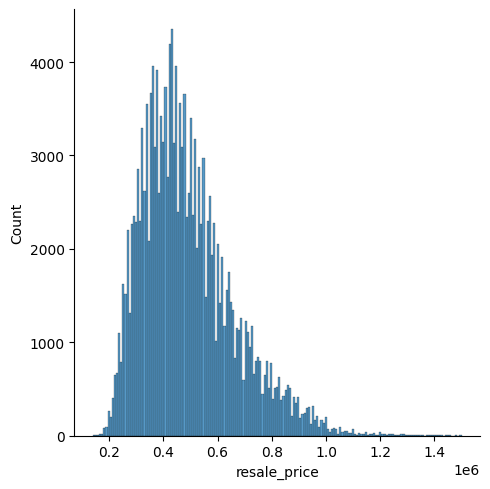

In [20]:
sns.displot(hdb_df['resale_price'])

In [21]:
hdb_df.describe()

,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
count,166688.000000,166688.000000,166688.000000,166688.000000,1.666880e+05
mean,4.130825,9.767296,97.324545,74.694748,4.896632e+05
std,0.916937,5.947182,24.022337,13.833518,1.693722e+05
min,1.000000,3.000000,31.000000,42.250000,1.400000e+05
25%,3.000000,6.000000,82.000000,63.416667,3.650000e+05
50%,4.000000,9.000000,93.000000,74.666667,4.600000e+05
75%,5.000000,12.000000,112.000000,87.833333,5.800000e+05
max,6.000000,51.000000,249.000000,97.750000,1.500000e+06


<Axes: >

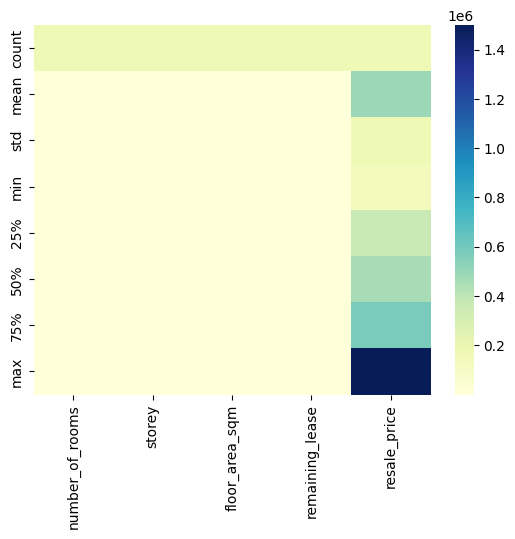

In [22]:
sns.heatmap(hdb_df.describe(), cmap = "YlGnBu")

In [23]:
hdb_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [24]:
hdb_df = hdb_df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
hdb_df = hdb_df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [25]:
hdb_df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [26]:
hdb_df = hdb_df.rename(columns={'town':'region'})

In [27]:
X = hdb_df.iloc[:,:-1].values
y = hdb_df.iloc[:,-1].values

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [29]:
X[1,:]

array([1.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 67.0, 60.583333333333336],
      dtype=object)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
# Import neccessary library to evaluate the performance of each machine learning model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [32]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.6663645980930055

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Let's determine the best degree for polynomial
for n in range(2,5):
    poly_reg = PolynomialFeatures(degree = n)
    X_poly = poly_reg.fit_transform(X_train)
    pr = LinearRegression()
    pr.fit(X_poly, y_train)
    poly_ypred = pr.predict(poly_reg.transform(X_test))
    poly_acc = r2_score(y_test,poly_ypred)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_ypred))
    print(r'The accuracy of polynomial regression with degree of {} is {}'.format(n,poly_acc))
    print(r'The RMSE of polynomial regression with degree of {} is {}'.format(n,poly_rmse))

The accuracy of polynomial regression with degree of 2 is 0.7301067864740904
The RMSE of polynomial regression with degree of 2 is 87334.58048894667
The accuracy of polynomial regression with degree of 3 is 0.7424976410459495
The RMSE of polynomial regression with degree of 3 is 85306.25218791116
The accuracy of polynomial regression with degree of 4 is 0.7540633021628895
The RMSE of polynomial regression with degree of 4 is 83368.48799870384


In [34]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(X_train, y_train)
ridge_ypred = ridge_r.predict(X_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

0.6663350091827467

In [35]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter=100000)
lasso_r.fit(X_train, y_train)
lasso_ypred = lasso_r.predict(X_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.6663354364742908

In [36]:
from sklearn.linear_model import ElasticNet
EN_r = ElasticNet()
EN_r.fit(X_train, y_train)
EN_ypred = EN_r.predict(X_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.5784072064993888

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.7338424310951205

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.7972116549267338

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_11528\1401320706.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_11528\1401320706.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


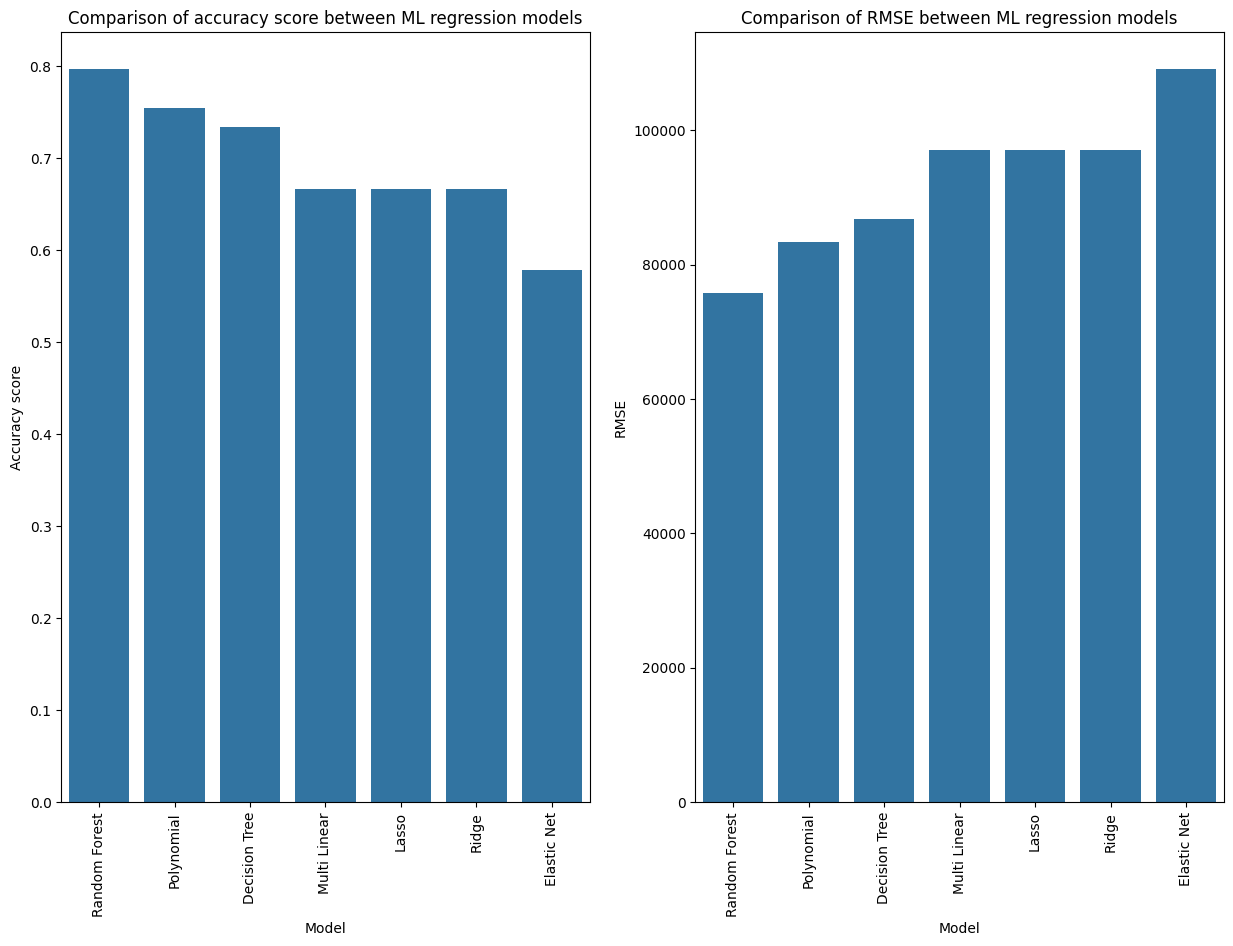

In [39]:
# Accuracy score for multi linear regression
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))
# Evaluation for polynomial regression has been calculated in finding the best degree
# Evaluation for ridge regression
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_ypred))
# Evaluation for lasso regression
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))
# Evaluation for elastic net regression
EN_acc = r2_score(y_test,EN_ypred)
EN_rmse = np.sqrt(mean_squared_error(y_test,EN_ypred))
# Evaluation for decision trees regression
tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))
# Evaluation for elastic random forest regression
forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))
# Let's put it as a list and compare it in a bar chart
model_acc_score = [mlr_acc,poly_acc, ridge_acc, lasso_acc, EN_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, poly_rmse, ridge_rmse, lasso_rmse, EN_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

In [40]:
# We know that after One Hot Encoding, the value of Central, East, North, South, and West is one at column 1,2,3,4, and 5, respectively (following alphabetical order).
area = ['Central','East','North','South','West']
pred_price_central = forest_r.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_east = forest_r.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_north = forest_r.predict([[0.0, 0.0, 1.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_south = forest_r.predict([[0.0, 0.0, 0.0, 1.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_west = forest_r.predict([[0.0, 0.0, 0.0, 0.0, 1.0, 4, 9, 95.0, 75]])[0]
resale_price = [pred_price_central,pred_price_east,pred_price_north,pred_price_south,pred_price_west]
predict_df = pd.DataFrame(list(zip(area, resale_price)),
              columns=['Area','Predicted HDB price (SGD)'])
predict_df.round()

,Area,Predicted HDB price (SGD)
0,Central,711289.0
1,East,695358.0
2,North,499822.0
3,South,766753.0
4,West,536257.0
